In [1]:
import numpy as np 
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.11/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [115]:
def trainModel(x,y):

    ANNreg = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)  
    )
    lossFunc = nn.MSELoss()
    optimizer = torch.optim.SGD(ANNreg.parameters(),lr=0.05)

    numEpochs = 500
    losses = torch.zeros(numEpochs)

    for epochi in range(numEpochs):
        yHat = ANNreg(x)
        loss = lossFunc(yHat,y)
        losses[epochi] = loss

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    predictions = ANNreg(x)
    return predictions,losses

In [117]:
def createData(m):
    N = 50 
    x = torch.randn(N,1)
    y = m*x + torch.randn(N,1)/2
    return x,y


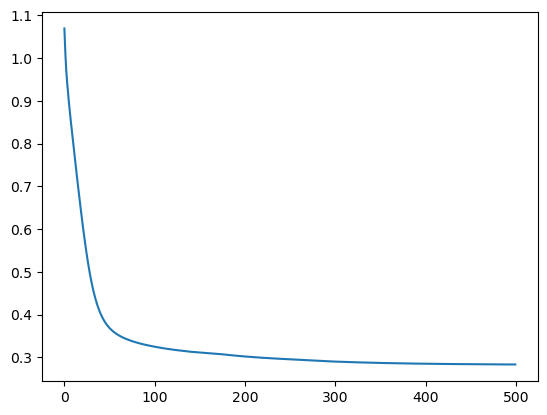

In [119]:
x,y = createData(0.8)

yHat,losses = trainModel(x,y)
plt.plot(losses.detach())

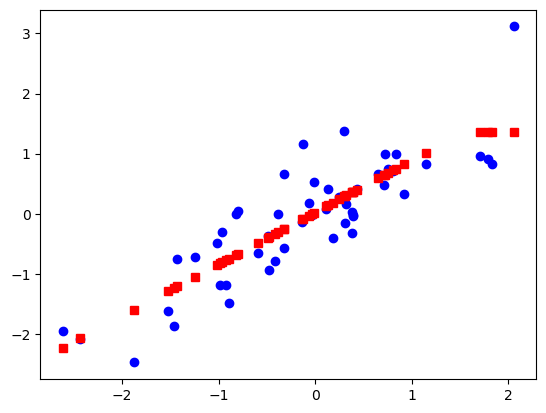

In [121]:
plt.plot(x,y,'bo')
plt.plot(x,yHat.detach(),'rs')

In [131]:
slopes = np.linspace(-2,2,21)
numExps = 50

results = np.zeros((len(slopes),numExps,2))

for slopei in range(len(slopes)):
    for N in range(numExps):
        x,y = createData(slopes[slopei])
        yHat, losses = trainModel(x,y)

        results[slopei,N,0] = losses[-1]
        results[slopei,N,1] = np.corrcoef(y.detach().T,yHat.detach().T)[0,1]

results[np.isnan(results)] = 0


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


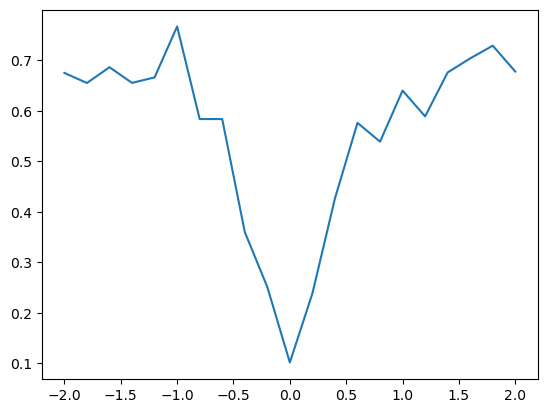

In [141]:
plt.plot(slopes,np.mean(results[:,:,1],axis=1))

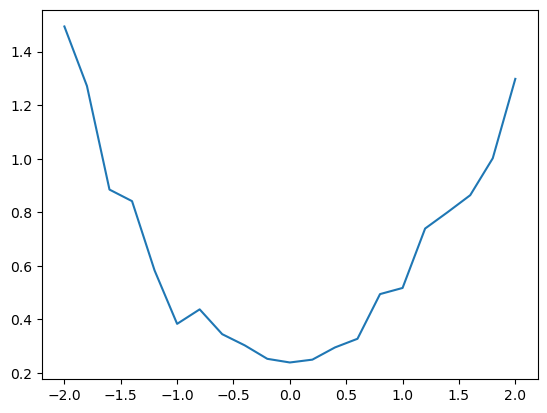

In [143]:
plt.plot(slopes,np.mean(results[:,:,0],axis=1))

In [139]:
np.mean(results[:,:,1])

0.5607548818417308